In [1]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

In [2]:
lbl2name = dict(
  n02086240= 'Shih-Tzu',
  n02087394= 'Rhodesian ridgeback',
  n02088364= 'Beagle',
  n02089973= 'English foxhound',
  n02093754= 'Australian terrier',
  n02096294= 'Border terrier',
  n02099601= 'Golden retriever',
  n02105641= 'Old English sheepdog',
  n02111889= 'Samoyed',
  n02115641= 'Dingo'
)

In [3]:
path = untar_data(URLs.IMAGEWOOF); path.ls()

(#2) [/home/lgvaz/.fastai/data/imagewoof/val,/home/lgvaz/.fastai/data/imagewoof/train]

In [4]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
          get_items=get_image_files,
          splitter=GrandparentSplitter(valid_name='val'),
          get_y=[parent_label, lbl2name.get])

In [5]:
dbunch = dblock.databunch(path,
                          bs=64,
                          item_tfms=[FlipItem(), RandomResizedCrop(128, 0.35)],
                          batch_tfms=[Normalize(*imagenet_stats)])

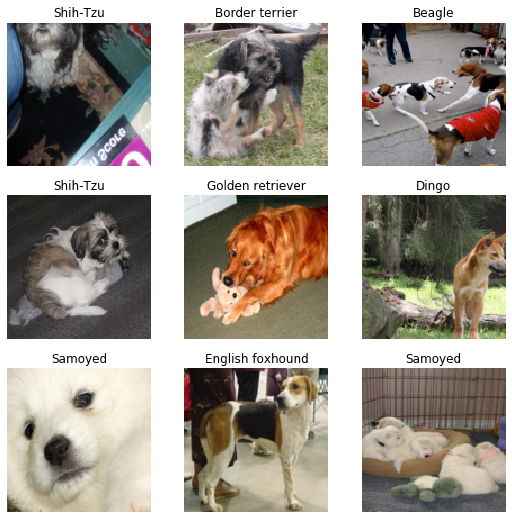

In [6]:
dbunch.show_batch()

In [7]:
def opt_func(*args, **kwargs):
  opt = RAdam(*args, mom=0.95, wd=1e-2, eps=1e-6, **kwargs)
  return Lookahead(opt)

In [8]:
m = xresnet50(c_out=dbunch.c, sa=True, sym=False, act_cls=MishJit)
learn = Learner(dbunch, m, LabelSmoothingCrossEntropy(), metrics=[accuracy], opt_func=opt_func)

## Results

In [9]:
# 0.65, 0.64
learn.fit_flat_cos(5, 4e-3, pct_start=.72, wd=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.954447,2.488014,0.268000,01:02
1,1.783182,1.990843,0.338000,00:55
2,1.613038,1.576200,0.502000,00:52
3,1.464347,1.480333,0.560000,00:58
4,1.259610,1.297685,0.648000,00:59
